<div align="center">
    <h1>Heart Disease</h1>
</div>

<div>
    <h1>Introduction to Artificial Intelligence | Project 2 | Universidad del Valle</h1>
</div>

![Imagen](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/articles/health_tools/did_you_know_this_could_lead_to_heart_disease_slideshow/493ss_thinkstock_rf_heart_illustration.jpg)

## Authors
- Bryan Steven Biojó     - 1629366
- Julián Andrés Castaño  - 1625743
- Juan Sebastián Saldaña - 1623447
- Juan Pablo Rendón      - 1623049

## Objective
- Apply the concept of Machine Learning (ML) to solve a **classification problem** using the methods seen in the course.

## 1. Importing libraries
As a first step, the libraries used during the development of the problem will be imported:

In [45]:
# Common libraries
import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import re
import os
import sys
import warnings
import itertools
warnings.filterwarnings('ignore')
from pandas.api.types import CategoricalDtype
from matplotlib.legend_handler import HandlerLine2D
from IPython.display import SVG, display
from graphviz import Source

# Sklearn libraries
import sklearn
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
#from sklearn.externals.six import StringIO

# Keras libraries
from keras.models import Sequential
from keras.layers.core import Dense

# Disabling TensorFlow warning messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Another function that captures warnings
def warn(*args, **kwargs):
    pass

## 2. Loading the dataset
Next, we will load the dataset with the heart diseases which are in a CSV file. Said data was extracted directly from the **Kaggle** website (https://www.kaggle.com/ronitf/heart-disease-uci) and uploaded again to the following **GitHub** repository (https://github.com/bryansbr/heart-disease-AI:

In [3]:
# Heard disease dataset
url = "https://raw.githubusercontent.com/bryansbr/heart-disease-AI/main/heart.csv"
data = pd.read_csv(url)
print(data.columns)
print(data.shape)
data.head()
#data.describe()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 3. Data description
In total we have 14 columns with the following information:

- **age:** Age in years.
- **sex:** Where (1 = male; 0 = female).
- **cp:** Chest pain type. Where (1 = angina; 2 = pain without angina; 3 = asymptomatic).
- **trestbps:** Resting blood pressure (in mm/Hg on admission to the hospital).
- **chol:** Serum cholesterol of the person in mg/dl.
- **fbs:** Fasting blood sugar > 120 mg/dl. Where (1 = true; 0 = false).
- **restecg:** Resting electrocardiographic results. Where (0 = normal; 1 = with ST-T wave abnormality (T wave inversions and/or ST elevation or depression > 0.05 mV); 2 = showing probable or definitive left ventricular hypertrophy according to Romhilt criteria-Estes).
- **thalach:** Maximum heart rate achieved.
- **exang:** Exercise induced angina (1 = yes; 0 = no). 
- **oldpeak:** ST depression induced by exercise relative to rest.
- **slope:** The slope of the peak exercise ST segment. Where (0 = ascending slope; 1 = flat; 2 = descending slope).
- **ca:** Number of major vessels (0 - 3) colored by flourosopy.
- **thal:** Blood disorder known as 'Thalassemia'. Where (3 = normal; 6 = fixed defect; 7 = reversable defect).
- **target:** Indicates the probability of suffering from heart disease, according to the information in the preceding columns (1 = yes; 0 = no). This is the column that we want to **predict** with our ML models.

## 4. Types of variables
Now, we will group the variable types into numeric or categorical as appropriate. The **numerical variables** are those statistical variables that give, as a result, a numerical value and these can be discrete or continuous, while the **categorical variables** can take one of a limited number, and usually fixed, of possible values that are base of some qualitative characteristic.

According to the above, the grouping of the variables would be as follows:

|   **Variable**  |   **Type**  |
|-----------------|-------------|
|    **age**      |  numerical  |
|     **sex**     | categorical |
|    **cp**       | categorical |
|   **trestbps**  |  numerical  |
|     **chol**    |  numerical  |
|     **fbs**     | categorical |
|   **restecg**   | categorical |
|   **thalach**   |  numerical  |
|    **exang**    | categorical |
|   **oldpeak**   |  numerical  |
|    **slope**    | categorical |
|     **ca**      | categorical |
|    **thal**     | categorical |
|   **target**    | categorical |


## 5. Grouping of variables according to their type
Before graphing, we must verify that our variables correspond to the type in which they have been classified (numerical or categorical). There must be no missing or null data, as well as strings of characters where numbers must go and vice versa.

### 5.1. Checking for missing or null data
We check for missing or null data in our dataset. If they exist, we must complete or delete them as appropriate.

In [5]:
# We check if there is missing or null data
print("Exists NaN data in the dataset?: ")
print(data.isna().any().any())
print("---------------------------------")
print("Exists null data in the dataset?:")
print(data.isnull().any().any())

Exists NaN data in the dataset?: 
False
---------------------------------
Exists null data in the dataset?:
False


In this case, we see that there is no null or missing data, so we can proceed to make the respective conversions.

### 5.2. Grouping and converting variables
We group the numerical and categorical variables and the target variable.

In [20]:
# Array for numerical variables
numerical_vars = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Array for categorical variables
categorical_vars = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# Target variable
target = "target"

# We convert the corresponding attributes to numerical. In Python, numerical is the default datatype
for columns in numerical_vars:
    data[columns] = pd.to_numeric(data[columns], errors = 'coerce')
    
# Now, we convert the corresponding attributes to categorical.
for columns in categorical_vars:
    cat_type = CategoricalDtype(categories = None, ordered = False)
    data[columns] = data[columns].astype(dtype = cat_type)

## 6. Graphing the variables
According to the previous information, the graphs of the variables are made. The numerical variables will be represented as **histograms**, while the categorical variables as **pie diagrams**.

### 6.1. Numerical variables
- age.
- trestbps.
- chol.
- thalach.
- oldpeak.

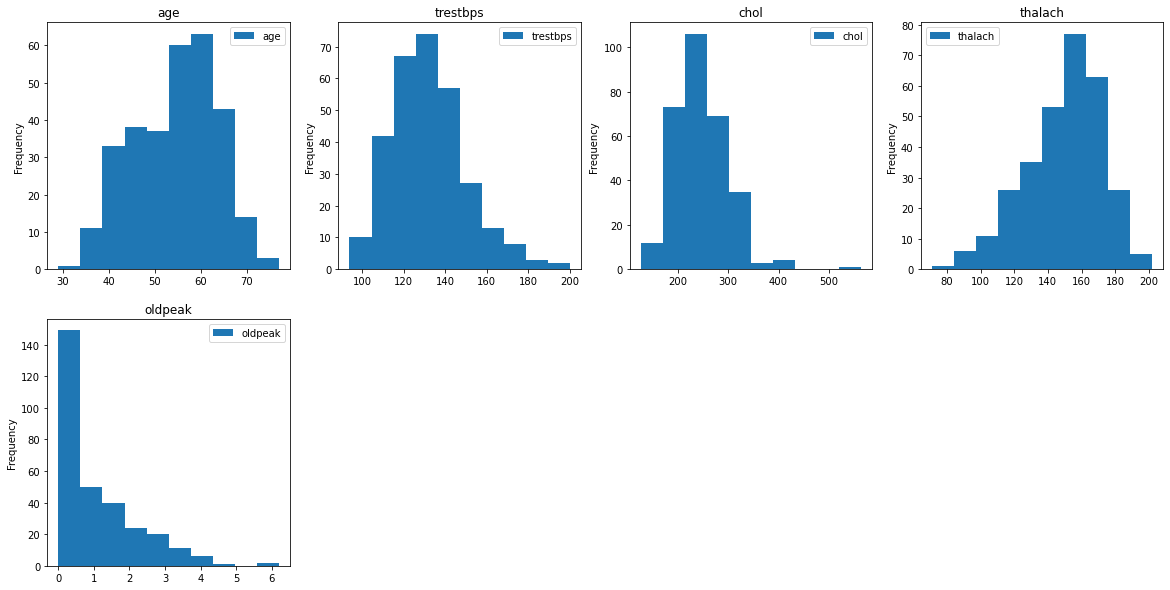

In [23]:
# Figure type object to develop the subplots
fig = plt.figure(figsize = (20, 10))
i = 1

# Graphs of type histogram numerical variables
for num_attrs in numerical_vars:
    ax = fig.add_subplot(2, 4, i)
    data[[num_attrs]].plot(kind = 'hist', ax = ax, rwidth = 1)
    # Kind of switch-case to place the titles in the upper part
    if (i == 1):
        plt.title("age")
    elif (i == 2):
        plt.title("trestbps")
    elif (i == 3):
        plt.title("chol")  
    elif (i == 4):
        plt.title("thalach")
    elif (i == 5):
        plt.title("oldpeak")
    i += 1

 ### 6.3. Categorical variables
- sex.
- cp.
- fbs.
- restecg.
- exang.
- slope.
- ca.
- thal.
- target.

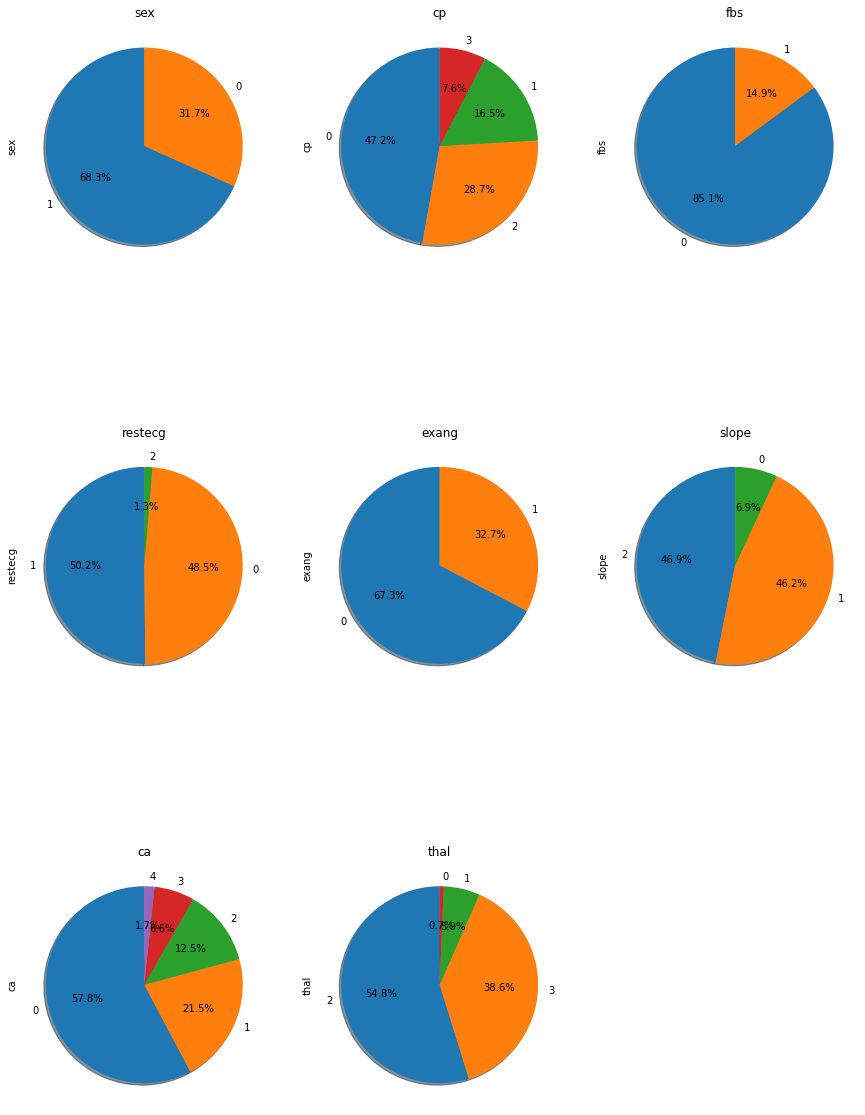

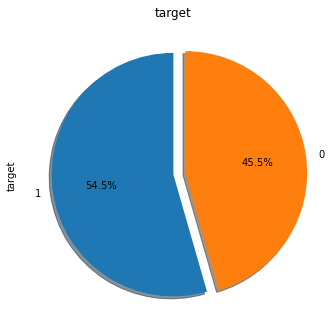

In [36]:
# Figure type object to develop the subplots
fig = plt.figure(figsize = (15, 45))
i = 1

# Graphs of type histogram categorical variables
for cat_attrs in categorical_vars:
    ax = fig.add_subplot(6, 3, i)      
    data[cat_attrs].value_counts().plot(kind = 'pie',
                                        autopct = '%1.1f%%', # Adding percentages
                                        ax = ax, 
                                        startangle = 90, # Start angle 90° (Africa)
                                        fontsize = 10,
                                        shadow = True) # Add shadow
    # Kind of switch-case to place the titles in the upper part
    if (i == 1):
        plt.title("sex")
    elif (i == 2):
        plt.title("cp")
    elif (i == 3):
        plt.title("fbs")  
    elif (i == 4):
        plt.title("restecg")
    elif (i == 5):
        plt.title("exang")
    elif (i == 6):
        plt.title("slope")  
    elif (i == 7):
        plt.title("ca")
    elif (i == 8):
        plt.title("thal")
    i += 1
    
# Graphing the target variable individually 'target'
fig = plt.figure(figsize = (15, 45))
ax = fig.add_subplot(1, 2, 1)
data["target"].value_counts().plot(kind = 'pie',
                                   figsize = (12, 10),
                                   autopct = '%1.1f%%', # Adding percentages
                                   startangle = 90, # Start angle 90° (Africa)
                                   fontsize = 10,
                                   shadow = True, # Add shadow
                                   explode = [0, 0.1])
plt.title("target")

# Show the pie charts
plt.show()

## 7. Preparing the data for classification
There are some methods that do not accept categorical variables as inputs to algorithms. For this reason, we must convert categorical variables to numeric and for this, we will use dummies variables.

In [24]:
# We make a copy of the original dataset
data_copy = data.copy()

# We convert categorical variables to numerical
for cat_attrs in categorical_vars:
    dummies = pd.get_dummies(data_copy[cat_attrs], prefix = cat_attrs)
    data_copy = pd.concat([data_copy.drop(cat_attrs, axis = 1), dummies], axis = 1)

# We display the dataset again with the categorical variables converted to numerical
print(data_copy.columns)
print(data_copy.shape)
data_copy.head()
#data_copy.describe()

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')
(303, 31)


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


## 8. Generating the training and test datasets
Next, we will divide the data set into two parts: 80% for training and 20% for testing.

In [25]:
# We divide the dataset into two parts
features = data_copy.target.values
tg = data_copy.drop("target", axis = 1)
trainX, testX, trainY, testY = train_test_split(tg, features, test_size = 0.2, stratify = features)

# We print the training and test dataset
print("Number of training tuples:")
print(trainX.shape, trainY.shape)
print("--------------------------")
print("Number of test tuples:")
print(testX.shape, testY.shape)

Number of training tuples:
(242, 30) (242,)
--------------------------
Number of test tuples:
(61, 30) (61,)


# 9. Implementation of the models
With the data separated for training and testing, we will proceed to implement the different models for the prediction of our target variable/column, in this case **target**. The models to implement are: **Decision Tree**, **Naive Bayes** and **Neural Network**.

## Confusion Matrix (*)
A confusion matrix is a tool that allows the visualization of the performance of an algorithm that is used in supervised learning. Each column in the matrix represents the number of predictions for each class, while each row represents the instances in the actual class.

The correct interpretation of the confusion matrix is given below, provided directly from the scikit-learn library (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html):

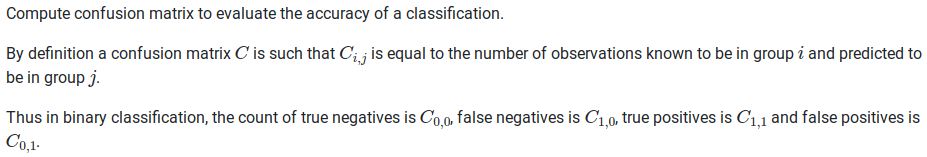

![Imagen](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg)

We are going to implement a function that allows us to visualize the confusion matrix in a better way.

In [100]:
# Function for visualize the confusion matrix
def plot_confusion_matrix(cm, target_names, title = 'Confusion Matrix', cmap = None, normalize = True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    
    if cmap is None:
        cmap = plt.get_cmap('Wistia')
    plt.figure(figsize = (7, 5))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation = 45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment = "center",
                     color = "white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment = "center",
                     color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Prediction')
    plt.xlabel('Real\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## 9.1 Decision Tree
Technique that allows analyzing sequential decisions based on the use of results and associated probabilities. These can be used to generate expert systems, binary searches, game trees, among others.

![Imagen](https://tierradenumeros.com/publication/201812-epsilon-diagrama-arbol/featured.jpg)

Score for training:
0.8842975206611571

Confusion Matrix:
[[101  19]
 [  9 113]]
----------------------------------------------------
Score for test:
0.7377049180327869

Confusion Matrix:
[[24 12]
 [ 4 21]]


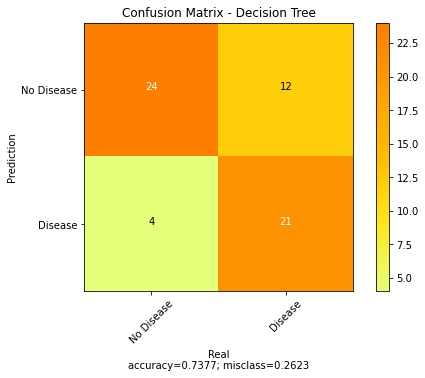

In [106]:
max_depthx = 11
min_samples_splitx = 20
model_tree = tree.DecisionTreeClassifier(max_depth = max_depthx, 
                                         min_samples_split = min_samples_splitx, 
                                         random_state = 1)
model_result = model_tree.fit(trainX, trainY)

# ====================== Training data ======================
#Print the score on the train data
print("Score for training:")
print(model_result.score(trainX, trainY))
# Show the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(model_result.predict(trainX), trainY))

print("----------------------------------------------------")

# ======================== Test data ========================
#Print the score on the test data
print("Score for test:")
print(model_result.score(testX, testY))
# Show the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(model_result.predict(testX), testY))

# Second way to visualize the confusion matrix
plot_confusion_matrix(cm = confusion_matrix(model_result.predict(testX), testY), 
                      normalize    = False,
                      target_names = ['No Disease', 'Disease'],
                      title        = "Confusion Matrix - Decision Tree")

### 9.1.1 Visualize the Decision Tree Model
Here we can see the visualization of the model for its respective interpretation:

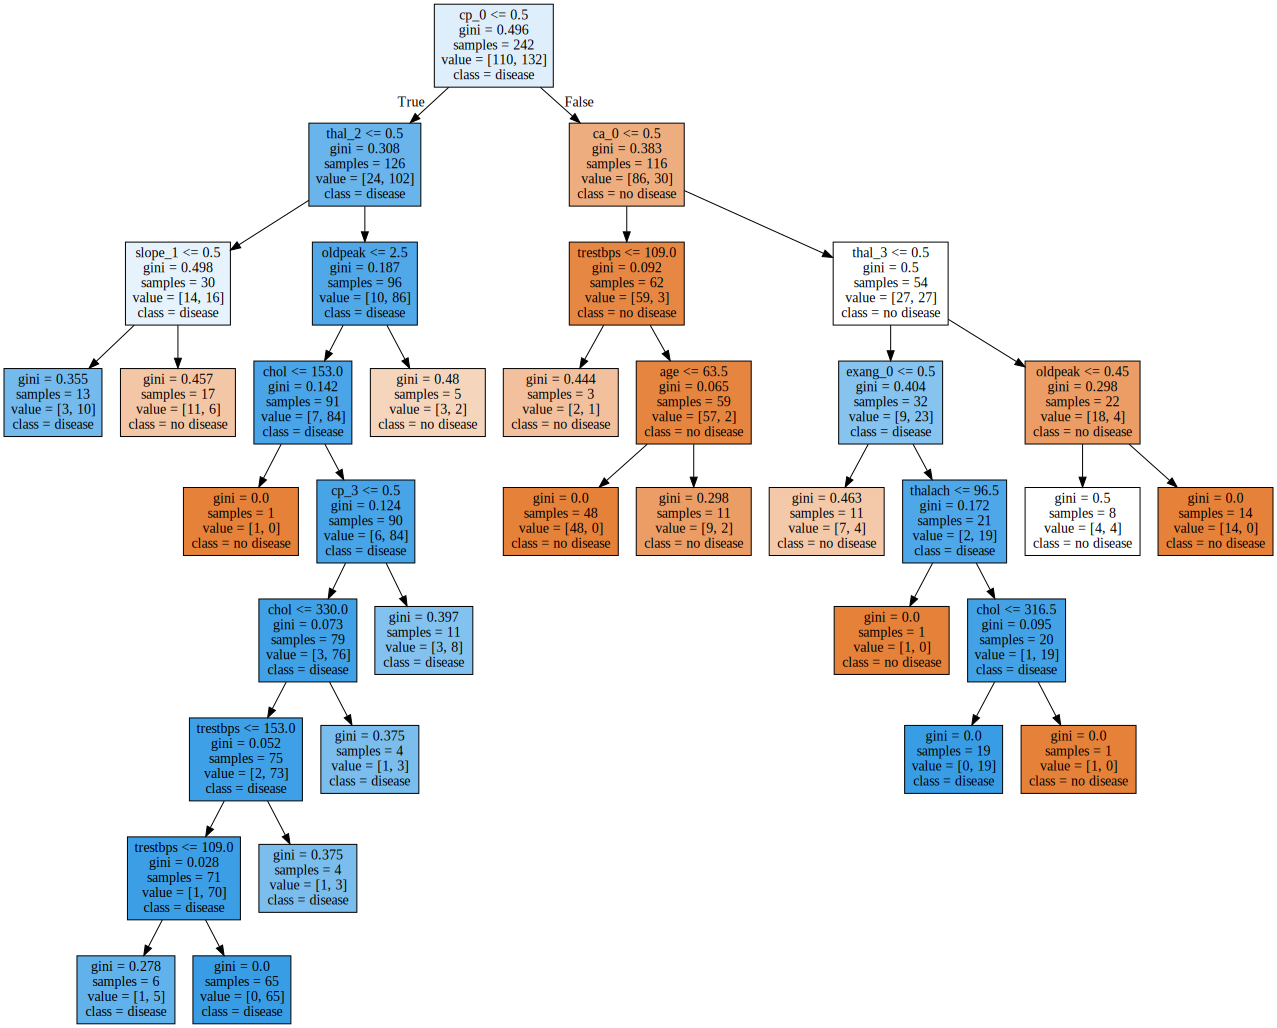

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [114]:
# Definition of classes
class_names = ["no disease", "disease"]
features_heart_labels = tg.columns

# Graphing the interpretation of the model
graph = Source(tree.export_graphviz(model_result, out_file = None,
                                    feature_names = features_heart_labels, 
                                    class_names = class_names, filled = True))

# Showing the model
display(SVG(graph.pipe(format = 'svg')))
tg.columns